In [1]:
import torch
from matplotlib import pyplot as plt
from skimage import io
from sparse_recon.sparse_deconv import sparse_deconv

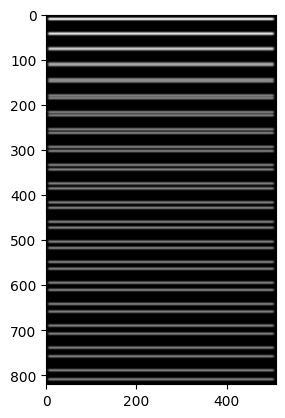

Start the Sparse deconvolution...
sparse-hessian time 3.88s
deconv time0.05s


In [2]:
im = io.imread("../2222.tif")
imtype = im.dtype
plt.imshow(im, cmap="gray")
plt.show()

im = torch.tensor(im, device="cuda")
pixelsize = 65  # (nm)
resolution = 280  # (nm)
img_recon = sparse_deconv(im, resolution / pixelsize)

In [3]:
img_recon = img_recon.squeeze(0).squeeze(0)
img_recon = img_recon.detach().cpu().numpy()

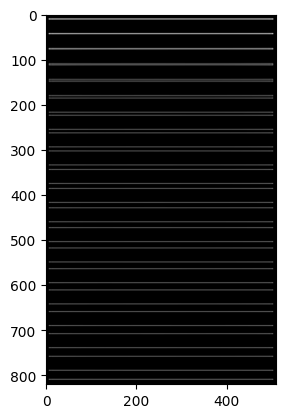

In [4]:
plt.imshow(img_recon / img_recon.max() * 255, cmap="gray")
plt.show()
io.imsave("test_processed.tif", img_recon.astype(imtype))